In [1]:
import csv
import os
import nltk
import stopwordsiso as stopwords
from nltk.tokenize import word_tokenize, WordPunctTokenizer 
from collections import Counter
import re

In [2]:
text = open('reviews.txt',encoding="utf8")
#print(text.read())

#PREPARATION OF MATERIALS
stpwrds = stopwords.stopwords(["en","tl"])

#POSITIVE
pos_tl = open('positive_words_tl.txt',encoding = 'utf8')
pos_en = open('Positive.txt')

pos_tl = str(pos_tl.read())
pos_en = str(pos_en.read())

#convert string to list
pos_tl_list = pos_tl.split('\n')
pos_en_list = pos_en.split('\n')

#NEGATIVE
neg_tl = open('negative_words_tl.txt',encoding = 'utf8')
neg_en = open('Negative.txt')

neg_tl = str(neg_tl.read())
neg_en = str(neg_en.read())

#convert string to list
neg_tl_list = neg_tl.split('\n')
neg_en_list = neg_en.split('\n')

#COMBINE THE POSTIVE LIST/NEGATIVE LIST
positive_dict = list(pos_en_list) 
positive_dict.extend(x for x in pos_tl_list if x not in positive_dict)

negative_dict = list(neg_en_list)
negative_dict.extend(x for x in neg_tl_list if x not in negative_dict)

In [3]:
def tokenize(data):
    tk = WordPunctTokenizer()
    textArray = tk.tokenize(data.lower())
    return textArray

In [4]:
def contractionsAndSymbols(tweet):
    import contractions
    # using contractions.fix to expand the shotened words 
    result = contractions.fix(tweet)
    
    #Remove the symbols,Hashtags,Mentions and links in the sentence
    stringString = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z])|(\w+:\/\/\S+)"," ",result)
    
    return stringString

In [5]:
def stopwords(textArray,stpwrds):
    filterArray = [item for item in textArray
                       if item not in stpwrds]
    return filterArray

In [6]:
def sentiment_analysis(stringFilter,pos_dict, neg_dict):
    pos_ctr = 0 #pos sentiment words counter
    neg_ctr = 0 #neg sentiment words counter
    neu_ctr = 0 #neu sentiment words counter
    
    sentence = stringFilter.split()
    #print(sentence)
    
    #getting sentiment per review
    for word in sentence:
        if word in pos_dict:
            pos_ctr += 1
        elif word in neg_dict:
            neg_ctr += 1
        else:
            neu_ctr += 1

    return pos_ctr - neg_ctr

In [8]:
total_pos = 0
total_neg = 0
total_neu = 0

all_words = []
f = open('review_sentiment.txt',"w",encoding="utf-8")
with open('up_dnd_tweets.txt',encoding='utf8') as fp:
    line = fp.readline()
    while line:
        data = line.strip("\n")
        
        #handle contractions,hashtags,mentions and URL
        tweet = contractionsAndSymbols(data)
        #print(tweet)
        
        #lower-case & tokenization
        tokenize_tweet = tokenize(tweet)
        #print(tokenize_tweet)
        
        #removing stopwords
        filterArray = stopwords(tokenize_tweet, stpwrds)
        #print(filterArray)
        
        all_words.extend(filterArray)
        
        #transform list into text String.
        stringFilter = ' '.join(filterArray)
        #print(stringFilter)
        
        result = sentiment_analysis(stringFilter,positive_dict,negative_dict)
        
        if(result > 0):
            total_pos += 1
            print(stringFilter +',Positive')
            f.write('"'+ stringFilter +'",Positive'+"\n")
        elif(result < 0):
            total_neg += 1
            print(stringFilter +',Negative')
            f.write('"'+ stringFilter +'",Negative'+"\n")
        else:
            total_neu += 1
            print(stringFilter +',Neutral')
        
        line = fp.readline()

print(f"Positive reviews:{total_pos}\n" +
      f"Negative reviews:{total_neg}\n"+
      f"Neutral reviews:{total_neu}")



news feature obvious unilateral abrogation dnd accord january 18 spearheaded department national defense secretary delfin lorenzana breaks agreement police 1 2,Negative
confirms observation watching ancmattersoffact couple days vice president public affairs dr elena pernia interviewed christian esguerra answers confusing stance administration dnd issue,Negative
joint resolution student regent staff regent faculty regent submitted bor support fortifying abrogating dnd accord 1989 joint resolution sectoral regents denied bor,Neutral
read diliman university council statement unilateral abrogation 1989 dnd accord,Neutral
statement diliman university council unilateral abrogation 1989 dnd agreement read statement defendup,Neutral
meeting officials abrogation dnd accord defense secretary delfin lorenzana thursday inclined termination stay consulting people military,Neutral
ancheadstart lorenzana dnd accord termination stays agreed continue discuss,Neutral
ancheadstart lorenzana suspension te

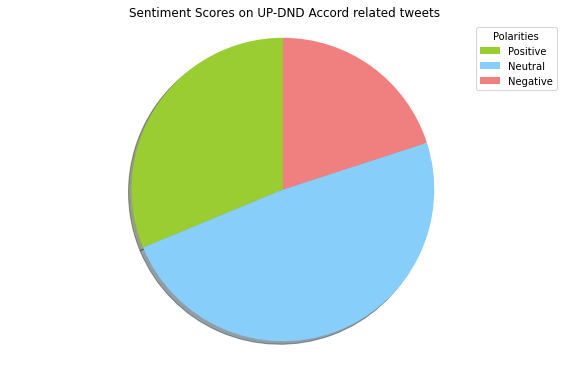

<Figure size 432x288 with 0 Axes>

In [9]:
#Visualization
import numpy as np
import matplotlib.pyplot as plt

sentiment = ["Positive","Neutral","Negative"]
values = [total_pos,total_neu,total_neg]
colors = ['yellowgreen','lightskyblue','lightcoral']
fig = plt.figure(figsize = (8,5))

#create bar graph
patches, texts = plt.pie(values,colors = colors, shadow = True,startangle = 90)
plt.legend(patches,sentiment,title = 'Polarities',loc ='best')
plt.axis('equal')
plt.tight_layout()
plt.title('Sentiment Scores on UP-DND Accord related tweets')
plt.show()
plt.savefig('up_dnd_sentiment_scores.png')

In [10]:
print(all_words)

['news', 'feature', 'obvious', 'unilateral', 'abrogation', 'dnd', 'accord', 'january', '18', 'spearheaded', 'department', 'national', 'defense', 'secretary', 'delfin', 'lorenzana', 'breaks', 'agreement', 'police', '1', '2', 'confirms', 'observation', 'watching', 'ancmattersoffact', 'couple', 'days', 'vice', 'president', 'public', 'affairs', 'dr', 'elena', 'pernia', 'interviewed', 'christian', 'esguerra', 'answers', 'confusing', 'stance', 'administration', 'dnd', 'issue', 'joint', 'resolution', 'student', 'regent', 'staff', 'regent', 'faculty', 'regent', 'submitted', 'bor', 'support', 'fortifying', 'abrogating', 'dnd', 'accord', '1989', 'joint', 'resolution', 'sectoral', 'regents', 'denied', 'bor', 'read', 'diliman', 'university', 'council', 'statement', 'unilateral', 'abrogation', '1989', 'dnd', 'accord', 'statement', 'diliman', 'university', 'council', 'unilateral', 'abrogation', '1989', 'dnd', 'agreement', 'read', 'statement', 'defendup', 'meeting', 'officials', 'abrogation', 'dnd', 

In [28]:
pos_words = []
neg_words = []

for word in all_words:
    if word in positive_dict:
        pos_words.append(word)
    elif word in negative_dict:
        neg_words.append(word)

pos_result = ' '.join(str(i) for i in pos_words)
neg_result = ' '.join(str(i) for i in neg_words)

In [56]:
def wordCloud(result):
    from wordcloud import WordCloud
    
    wordcloud = WordCloud(width = 800, height = 800,
                         background_color = 'white').generate(result)

    #plot the wordcloud
    plt.figure(figsize = (20,10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    plt.show() 

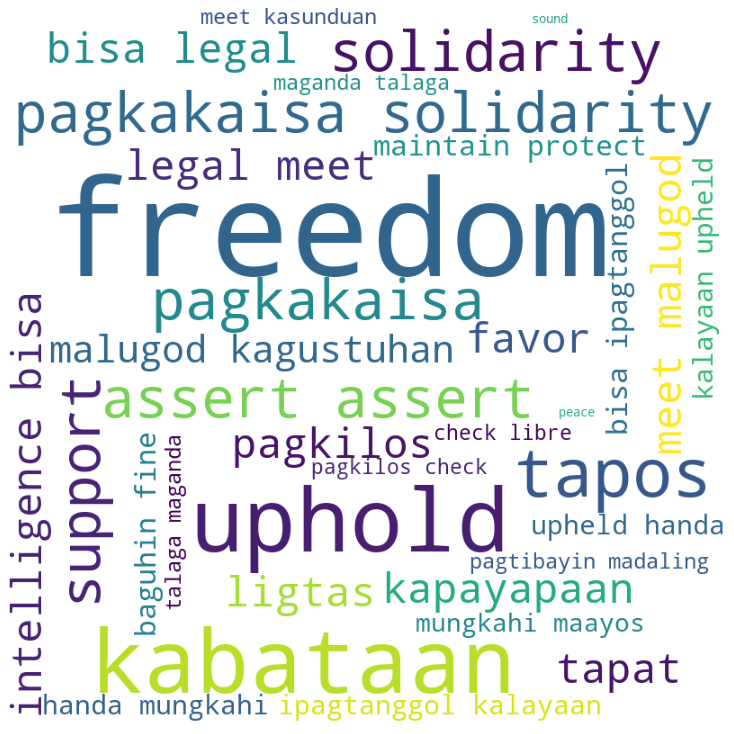

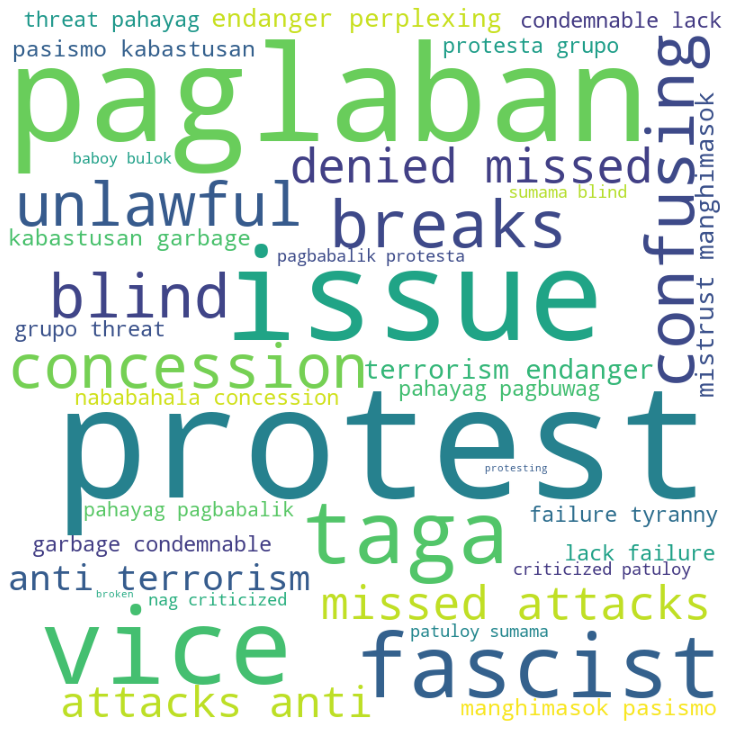

In [57]:
wordCloud(pos_result)
wordCloud(neg_result)